# 패키지 import 및 데이터 로딩
Pandas를 사용해 데이터를 로드합니다.
컬럼 이름은 population과 profit을 사용합니다.

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])
dataset.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Scatter Plot Visualization
matplotlib을 사용해 데이터를 시각화 합니다.

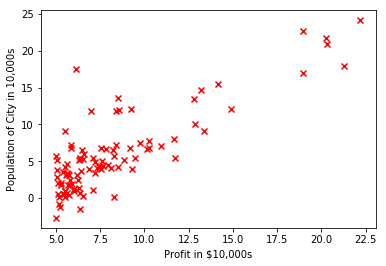

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(dataset['population'], dataset['profit'], marker="x", c="red")
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.show()

# 경사하강법
## 데이터준비
- X는 dataset의 population컬럼
- y는 dataset의 profit컬럼
- m은 X의 shape
- theta는 [0, 0] 값으로 준비

In [75]:
# 데이터 준비
X = dataset['population'].values
y = dataset['profit'].values
m = X.shape
theta = np.zeros(2)
print(X.shape, y.shape)

(97,) (97,)


## X0 데이터 추가
X에 x0 = [1, 1 ...] 데이터를 추가한다

In [76]:
# X에 x_0 추가
# x_0는 모든 값이 1로된 벡터
X = np.dstack([np.ones(m), X])[0]

# 행렬의 상위 5줄만 출력해 결과 확인
print("dstack 결과: \n", X[:5, :])
X.shape

dstack 결과: 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


(97, 2)

## 비용함수

In [77]:
def compute_cost(X, y, theta):
    m = len(y)
    J = 0
    
    # 행렬곱을 이용해 예측값 h를 계산
    h = X.dot(theta)

    # 에러 = h값과 y값의 차이
    error = (h - y)
    
    # 1/2m * sigma((h - y)^2)
    J = 1 / (2.0 * m) * np.sum(error ** 2)
    
    return J

compute_cost(X, y, theta)

32.072733877455676

## 경사하강법

In [102]:
iterations = 1500
alpha = 0.01
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(iterations)
    
    for i in range(num_iters):
        m = len(y)
        
        h = X.dot(theta)
        error = h - y
        result = (1.0 / m) * error.T.dot(X)
        theta = theta - alpha * result.T
        cost = compute_cost(X, y, theta)
        J_history[i] = cost
    return theta, J_history
theta_optimal, history = gradient_descent(X, y, theta, alpha, iterations)

print("minimum cost: {:.2f}".format(history[-1]))
print("optimal theta are: 0: {}, 1: {}".format(*theta_optimal))

minimum cost: 4.48
optimal theta are: 0: -3.63029143940436, 1: 1.166362350335582
